# DD1318 - Övning 3

Welcome back! This is a Colab Notebook. It enables us to run small blocks of python, show graphical output and have some explanatory bits of text inbetween. You can run it here in the browser or locally by using [jupyter](https://jupyter.org/). Try pressing the play button to the left of the following code snippet!

In [ ]:
print("Welcome back!")

Welcome back!


## Some new vocabulary

### import code you didn't write yourself

In [2]:
# import python libraries
import math

x = 4
y = math.sqrt(x)
print("Squareroot of 4 is:", y)


Squareroot of 4 is: 2.0


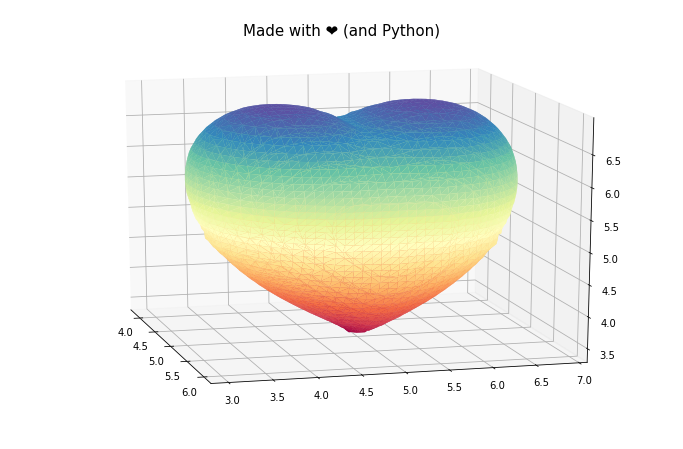

In [5]:
# import 3rd-party libraries (on your local setup, you need to use sth like pip: https://pip.pypa.io/en/stable/getting-started/)
# code taken from https://gist.github.com/franktoffel/f79d84319f043c1d3c897f3732489460
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
from skimage import measure

# Set up mesh
n = 100 
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
z = np.linspace(-3,3,n)
X, Y, Z =  np.meshgrid(x, y, z)

# Create cardioid function 
def f_heart(x,y,z):
    F = 320 * ((-x**2 * z**3 -9*y**2 * z**3/80) + (x**2 + 9*y**2/4 + z**2-1)**3)
    return F

# Obtain value to at every point in mesh
vol = f_heart(X,Y,Z) 

# Extract a 2D surface mesh from a 3D volume (F=0)
verts, faces, normals, values = measure.marching_cubes(vol, 0, spacing=(0.1, 0.1, 0.1))

# Create a 3D figure
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='Spectral', lw=1)

# Change the angle of view and title
ax.view_init(15, -15)
ax.set_title("Made with ❤ (and Python)", fontsize=15)
plt.show()

### check for scope name

In [ ]:
def cool_fn(my_list):
  return list(reversed(my_list))

# this only executes if you execute this module directly (LIVE DEMO)
if __name__ == '__main__':
  old_list = [1,2,3]
  new_list = cool_fn(old_list)
  print(old_list, "turned into", new_list)

### assertions

In [ ]:
x = 5
assert x == 5, "x should be 5!"   # this is okay, nothing will happen

y = 7
assert y == 5, "y should be 5!"   # crash

AssertionError: ignored

### optional function parameters


In [ ]:
import math

def cross_prod_3d(v1, v2, normalize=False):
  assert len(v1) == 3 and len(v2) == 3, 'both vectors need to be of length 3!'
  res = [0,0,0]
  res[0] = v1[1]*v2[2] - v1[2]*v2[1]
  res[1] = v1[2]*v2[0] - v1[0]*v2[2]
  res[2] = v1[0]*v2[1] - v1[1]*v2[0]

  if normalize:
    res_len = math.sqrt(res[0]*res[0]+ res[1]*res[1] + res[2]*res[2])
    res[0] = res[0] / res_len
    res[1] = res[1] / res_len
    res[2] = res[2] / res_len
  
  return res


if __name__ == '__main__':
  print(cross_prod_3d([2,0,0], [0,1,0]))
  print(cross_prod_3d([2,0,0], [0,1,0], normalize=False))
  print(cross_prod_3d([2,0,0], [0,1,0], normalize=True))

[0, 0, 2]
[0, 0, 2]
[0.0, 0.0, 1.0]


## Code Comments and DocTest

Inline code comments can be handy for readers of the code, but they can also provide additional functionality.

* **standardized comments** can be automatically converted into a documentation webpage
* with **doctests** the developer can quickly check their code for errors

In [ ]:
import doctest

def add_three_values(a, b, c):
  """
  Returns the sum of 3 numbers
  :param a: first number
  :param b: second number
  :param c: third number
  :return: result of the addition
  >>> add_three_values(1, 2, 3)
  6
  >>> add_three_values(0, 0, 0)
  0
  """
  return a + b + c

def mult_three_values(a, b, c):
  """
  multiplies three numbers and returns the result
  :param a: first number
  :param b: second number
  :param c: third number
  :return: the result of the multiplication
  >>> mult_three_values(4, 5, 6)
  120
  >>> mult_three_values(0, 5, 6)
  0
  """
  return a * b * c

if __name__ == '__main__':
    doctest.testmod()

## Exercise: Writing Code from Specification

When writing code in a team, it is common to design the code architecture and specify the behaviour of modules and functions before actually writing them. Let's try this ourselves! 

NOTE: you cannot save changes inside this document without making a copy of it into your own google drive.

In [ ]:
import doctest

# SPECIFICATION
"""
We define vectors and matrices using lists.

v1    v2
-------
1  |  3
2  |  4
-------
v1 = [1, 2]
v2 = [3, 4]

A matrix is a list of lists, which each "sublist" being a row in the matrix:

m1
-------
| 1 2 |
| 3 4 |
-------

m1 = [[1, 2], [3, 4]]
"""

def sum_vectors(v1, v2):
    """
    Asserts that the two vectors have matching lengths.
    Returns the sum of 2 vectors.
    :param v1: vector in list format
    :param v2: vector in list format
    :return: the sum of the two vectors
    >>> sum_vectors([1, 2], [2, 3])
    [3, 5]
    >>> sum_vectors([0, 0], [2, 3])
    [2, 3]
    """
    assert len(v1) == len(v2), "should be same length!"
    
    length = len(v1)
    res = []
    for i in range(length):
      res.append(v1[i] + v2[i])
    return res


def mult_vectors(v1, v2):
    """
    Asserts that the two vectors have matching lengths.
    Returns the scalar result (dot product) of multiplying two vectors
    (See https://en.wikipedia.org/wiki/Dot_product)
    :param v1: list assumed to be a row vector
    :param v2: list assumed to be a column vector
    :return: the dot product of the two vectors
    >>> mult_vectors([1, 2], [2, 3])
    8
    >>> mult_vectors([0, 2], [2, 3])
    6
    """
    assert len(v1) == len(v2), "should be same length!"
    length = len(v1)
    res = 0
    for i in range(length):
      res = res + v1[i] * v2[i]
    return res


def mult_matrix_vector(m, v):
    """
    Asserts that the matrix and the vector have matching sizes.
    Returns the result of a matrix-vector multiplication.
    :param m: a matrix
    :param v: a vector
    :return: the resulting vector
    >>> mult_matrix_vector([[1, 2], [3, 4]], [2, 3])
    [8, 18]
    >>> mult_matrix_vector([[1, 2], [3, 4]], [0, 0])
    [0, 0]
    """
    assert len(v) == len(m)
    res = []
    for i in range(len(m)):
      row = m[i]
      tmp = mult_vectors(row, v)
      res.append(tmp)
    return res

if __name__ == '__main__':
    doctest.testmod()